In [1]:
import numpy as np
import pandas as pd

country=pd.read_csv('GlobalLandTemperaturesByCountry.csv')
country.head()

dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland

In [2]:
# converting to datetime and extracting months and years
def converToDateTime(df):
 df = df.copy()
 df['dt'] = pd.to_datetime(df['dt'])
 df['Month'] = df['dt'].dt.month
 df['Year'] = df['dt'].dt.year
 return df

country1 = converToDateTime(country)
country1 = country1.drop(['dt','Month'], axis=1)

df = country1.set_index('Year')

In [3]:
df.head()

AverageTemperature  AverageTemperatureUncertainty Country
Year                                                           
1743               4.384                          2.294   Åland
1743                 NaN                            NaN   Åland
1744                 NaN                            NaN   Åland
1744                 NaN                            NaN   Åland
1744                 NaN                            NaN   Åland

In [4]:
df.isnull().sum()

AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [7]:
df.head()

AverageTemperature  AverageTemperatureUncertainty Country
Year                                                           
1743               4.384                          2.294   Åland
1744               1.530                          4.680   Åland
1744               6.702                          1.789   Åland
1744              11.609                          1.577   Åland
1744              15.342                          1.410   Åland

In [8]:
result_df = df.groupby([df.index, 'Country']).mean().reset_index()

In [9]:
result_df

Year         Country  AverageTemperature  AverageTemperatureUncertainty
0      1743         Albania             8.62000                       2.268000
1      1743         Andorra             7.55600                       2.188000
2      1743         Austria             2.48200                       2.116000
3      1743         Belarus             0.76700                       2.465000
4      1743         Belgium             7.10600                       1.855000
...     ...             ...                 ...                            ...
45910  2013  Western Sahara            23.74425                       1.133125
45911  2013           Yemen            28.12975                       1.335000
45912  2013          Zambia            21.19600                       0.825125
45913  2013        Zimbabwe            20.71075                       0.778500
45914  2013           Åland             6.22975                       0.536250

[45915 rows x 4 columns]

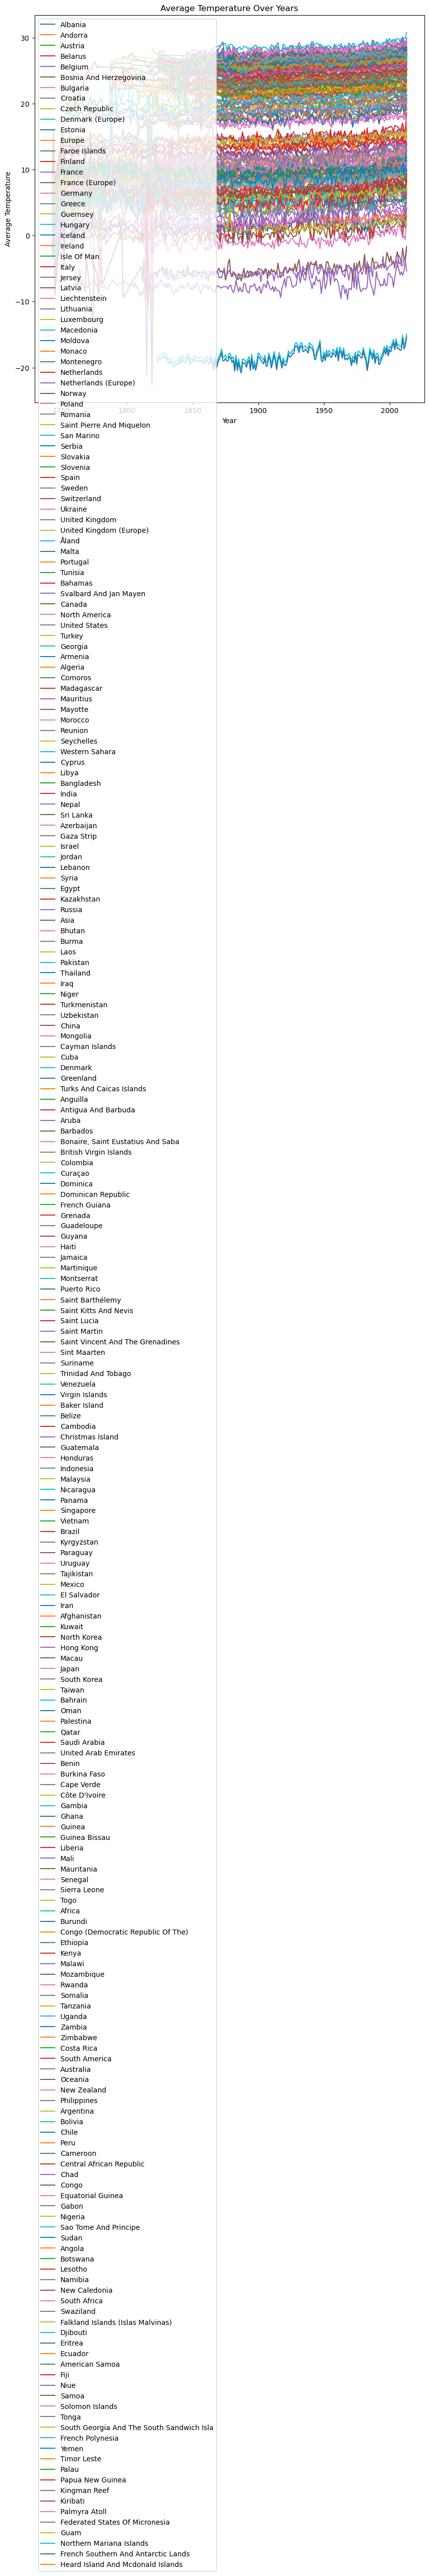

In [10]:
import matplotlib.pyplot as plt

# Plot average temperature over years for different countries
plt.figure(figsize=(10, 10))
for country in result_df['Country'].unique():
    subset = result_df[result_df['Country'] == country]
    plt.plot(subset['Year'], subset['AverageTemperature'], label=country)

plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Average Temperature Over Years')
plt.legend()
plt.show()

In [11]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [12]:
import plotly.express as px
year = 1820
subset_df = result_df[result_df['Year'] == year]

# Create a choropleth map
fig = px.choropleth(
    subset_df,
    locations='Country',
    locationmode='country names',
    color='AverageTemperature',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title=f'Average Temperature by Country in {year}'
)

fig.show()

In [13]:
year = 2013
subset_df = result_df[result_df['Year'] == year]

# Create a choropleth map
fig = px.choropleth(
    subset_df,
    locations='Country',
    locationmode='country names',
    color='AverageTemperature',
    hover_name='Country',
    color_continuous_scale=px.colors.sequential.Plasma,
    title=f'Average Temperature by Country in {year}'
)

fig.show()

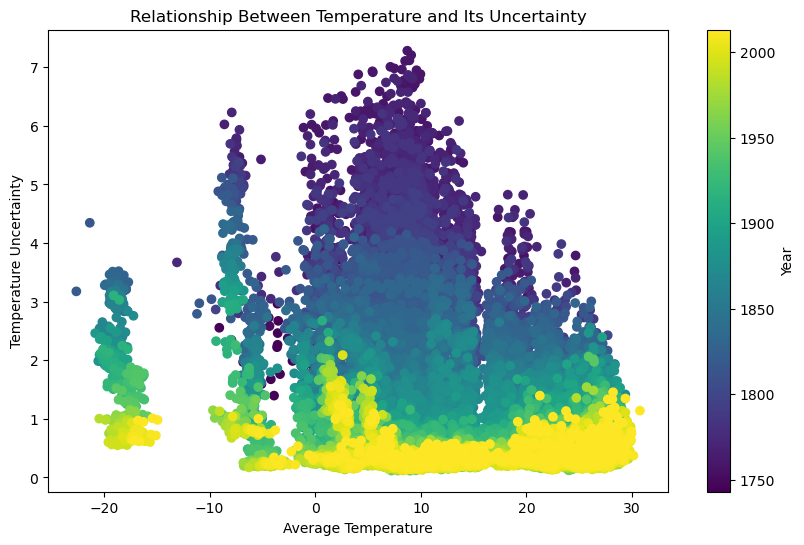

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(result_df['AverageTemperature'], result_df['AverageTemperatureUncertainty'], c=result_df['Year'], cmap='viridis')
plt.colorbar(label='Year')
plt.xlabel('Average Temperature')
plt.ylabel('Temperature Uncertainty')
plt.title('Relationship Between Temperature and Its Uncertainty')
plt.show()

In [15]:
pip install pandas scikit-learn matplotlib

In [16]:
from sklearn.linear_model import LinearRegression
X = result_df['Year'].to_numpy().reshape(-1, 1)
y = result_df['AverageTemperature'].to_numpy()

Warming Rate: 0.0405 degrees per year


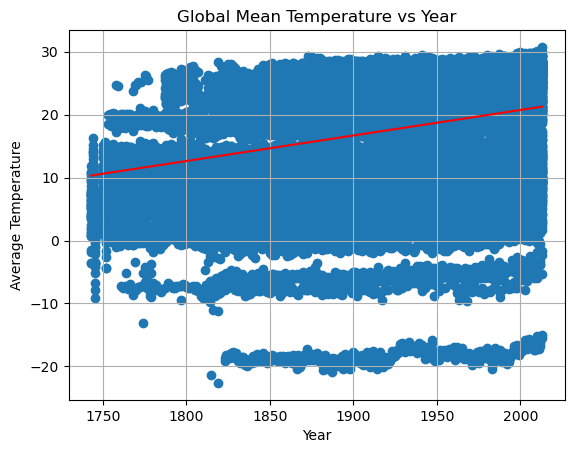

In [17]:
# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the slope (coefficient) representing warming rate
warming_rate = model.coef_[0]


print(f"Warming Rate: {warming_rate:.4f} degrees per year")  # Format for 4 decimal places


plt.scatter(X, y)
plt.plot(X, model.predict(X), color='red')  # Predicted values based on model
plt.xlabel('Year')
plt.ylabel('Average Temperature')
plt.title('Global Mean Temperature vs Year')
plt.grid(True)
plt.show()

C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

An unsupported index was provided and will be ignored when e.g. forecasting.

C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

C:\Users\koninika tarafdar\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported inde

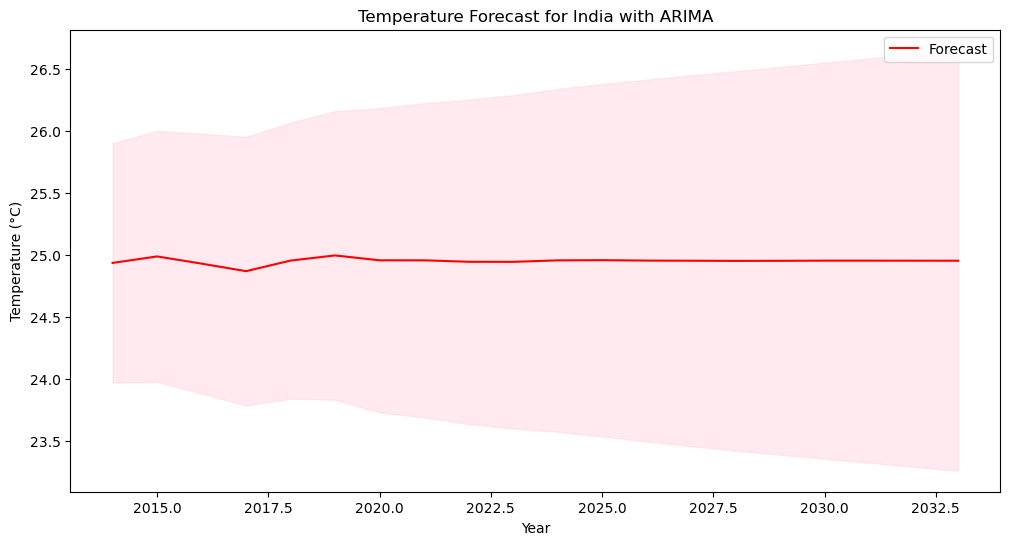

In [18]:

from statsmodels.tsa.arima.model import ARIMA
india_df = result_df[result_df['Country'] == 'India']

# Fit the ARIMA model
model = ARIMA(india_df['AverageTemperature'], order=(5, 1, 0))
results = model.fit()

# Forecast future values
forecast_steps = 20
forecast = results.get_forecast(steps=forecast_steps)
forecast_values = forecast.predicted_mean
conf_int = forecast.conf_int()

# Create a DataFrame for the forecast
years_forecast = [year for year in range(india_df['Year'].iloc[-1] + 1, india_df['Year'].iloc[-1] + 1 + forecast_steps)]
forecast_df = pd.DataFrame({
    'Year': years_forecast,
    'ForecastedTemperature': forecast_values,
    'LowerCI': conf_int.iloc[:, 0],
    'UpperCI': conf_int.iloc[:, 1]
})

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(forecast_df['Year'], forecast_df['ForecastedTemperature'], label='Forecast', color='red')
plt.fill_between(forecast_df['Year'], forecast_df['LowerCI'], forecast_df['UpperCI'], color='pink', alpha=0.3)
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Forecast for India with ARIMA')
plt.legend()
plt.show()